In [1]:
# Подключим нужные библиотеки, text.txt взят из задания

import gensim
import networkx as nx
import pymorphy2
from tqdm import tqdm

In [2]:
# Считаем текст и токенизируем его

with open('text.txt', 'r') as handle:
    text = handle.read()

words = list(gensim.utils.simple_tokenize(text))

In [3]:
# Вытащим все существительные, у которых стандартная форма содержит не меньше трёх букв 

nouns = set()
morph = pymorphy2.MorphAnalyzer()
for word in tqdm(words):
    p = morph.parse(word)[0]
    if p.tag.POS == 'NOUN':
        original_p = p.inflect({'sing', 'nomn'})
        if original_p is not None:
            normal_word = p.inflect({'sing', 'nomn'}).word
            if len(normal_word) >= 3:
                nouns.add(normal_word)

100%|██████████| 117076/117076 [00:30<00:00, 3857.96it/s]


In [4]:
# Построим следующий словарь: паре существительных в нормальной форме будет сопоставлено 
# количество раз, когда их производные формы были на расстоянии не больше 3 друг от друга

connections = {}
for i in tqdm(range(len(words))):
    p1 = morph.parse(words[i])[0]
    for j in range(max(0, i - 3), min(len(words), i + 3)):
        if i == j:
            pass
        p2 = morph.parse(words[j])[0]
        are_nouns = p1.tag.POS == 'NOUN' and p2.tag.POS == 'NOUN'
        if are_nouns:
            start_p1 = p1.inflect({'sing', 'nomn'})
            start_p2 = p2.inflect({'sing', 'nomn'})
            if start_p1 is not None and start_p2 is not None:
                first = p1.inflect({'sing', 'nomn'}).word
                second = p2.inflect({'sing', 'nomn'}).word
                if not first == second and len(first) >= 3 and len(second) >= 3: 
                    pair = (first, second)
                    connections[pair] = connections.get(pair, 0) + 1

100%|██████████| 117076/117076 [03:22<00:00, 578.16it/s]


In [5]:
# Построим граф по данной информации

edges = []
for pair, similarity in connections.items():
    if similarity > 2:
        edges.append(pair)
    
G = nx.Graph()
G.add_nodes_from(nouns)
G.add_edges_from(edges)

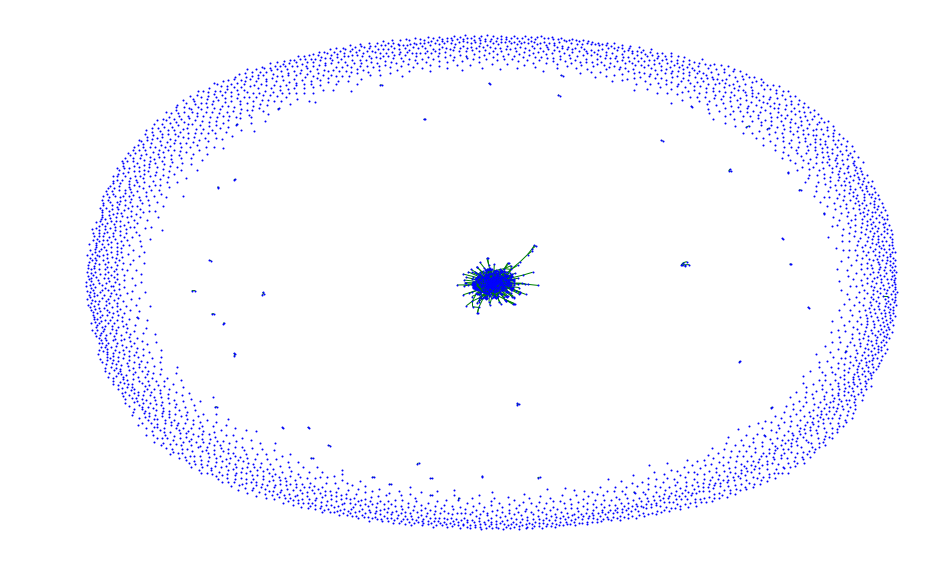

In [6]:
# Изобразим граф, используя spring layout

import matplotlib.pyplot as plt 
%matplotlib inline

pos = nx.spring_layout(G)
plt.figure(figsize=(16, 10))
nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=1) 
nx.draw_networkx_edges(G, pos, edge_color='green')
plt.axis('off') 
plt.show()

In [7]:
print('Плотность графа: {}'.format(nx.density(G)))
print('Коэффициент ассортативности: {}'.format(nx.degree_pearson_correlation_coefficient(G)))
print('Кластерный коэффициент: {}'.format(nx.average_clustering(G)))

Плотность графа: 0.00020465466747043512
Коэффициент ассортативности: -0.1828013118039322
Кластерный коэффициент: 0.03697963759587546


In [8]:
# Выведем 10 самых важных слов

deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True)[:10]:
    print(nodeid)

язык
значение
показатель
тип
ситуация
граммема
категория
словоформа
глагол
число
